<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
<font size="3"></br> Stochastic Processes </font></br></div>
</CENTER>
<CENTER>
<span style="color:black">Tales Marra - tales.marra@imt-atlantique.net</span>
</CENTER>
</div>

This work has been done in the course of Stochastic Processes in 2018, at IMT Atlantique: https://www.imt-atlantique.fr 

On commence par l'importation des libraries.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

Après,on attribue des valeurs aux constants.

In [3]:
X0 = math.pow(10, 6)
lamb = 1000
m = math.pow(10, 3)
cc = lamb*m
c1 = cc
c2 = cc/2
c3 = cc*2

Ci-dessous,sont crées deux fonctions. La fonction generate_Nt tire au sort des variables aléatoires d'une distribution de Poisson. La fonction generate_St permet de répresenter la somme entre 0 et N(qui suit une loi de Poisson)d'une suite de variables Y qui ont la loi exponentielle.

In [4]:
def generate_S():
    Nt = generate_Nt()
    sum = 0
    for i in range (0,Nt):
        sum= sum+np.random.exponential(m)
   
    return sum

def generate_Nt():
    Nt = np.random.poisson(lamb/1000)
    return Nt

Ici on produit le processus X, déjà défini dans la partie théorique.

In [5]:
def generate_process_X(c):
    t1 = 1
    t0 = 0
    X = np.zeros(1000)
    X[0] = X0
    for i in range (1,1000):
        X[i] = X[i-1] + c*(t1-t0)/1000 - generate_S()
    return X  

Maintenait, on prend l'esperance théorique du processus X, calculée dans la partie théorique.

In [6]:
def take_average(c):
    t1 = 1
    t0 = 0
    X = np.zeros(1000)
    X[0] = X0
    for i in range (1,1000):
        X[i] = X[i-1] + (c-cc)*(t1-t0)/1000 
    return X

Puis, on prend aussi son ecart type.

In [7]:
def take_std():
    t1 = 1
    t0 = 0
    std = np.zeros(1000)
    std[0] = 0
    for i in range (1,1000):
        std[i] =math.sqrt(2*m*m*(lamb)*i*(t1-t0)/1000) 
    return std

On fait maintenaint les graphiques. On peut voir que, dans 1000 réalisations, presque toutes les valeurs du processus se trouvent entre les curves qui correspondent à un intervale de confiance de 99%, comment c'est prévu dans la théorie.

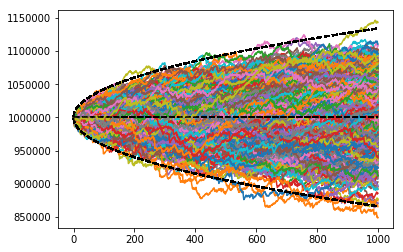

In [8]:
for i in range (1,1000):
    x=generate_process_X(c1)
    plt.plot(x)
    plt.plot(take_average(c1),linestyle='dashed',color='black')
    plt.plot(take_average(c1)+3*take_std(),linestyle='dashed',color='black')
    plt.plot(take_average(c1)-3*take_std(),linestyle='dashed',color='black')

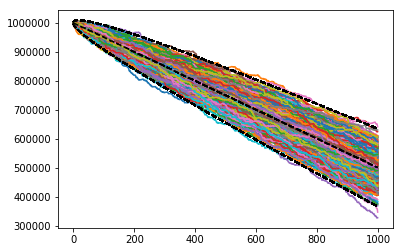

In [78]:
for i in range (1,1000):
    plt.plot(generate_process_X(c2))
    plt.plot(take_average(c2),linestyle='dashed',color='black')
    plt.plot(take_average(c2)+3*take_std(),linestyle='dashed',color='black')
    plt.plot(take_average(c2)-3*take_std(),linestyle='dashed',color='black')

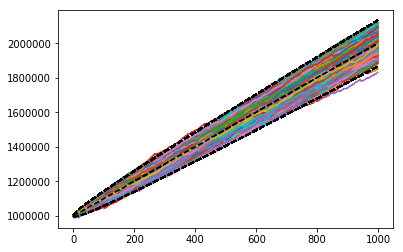

In [79]:
for i in range (1,1000):
    plt.plot(generate_process_X(c3))
    plt.plot(take_average(c3),linestyle='dashed',color='black')
    plt.plot(take_average(c3)+3*take_std(),linestyle='dashed',color='black')
    plt.plot(take_average(c3)-3*take_std(),linestyle='dashed',color='black')

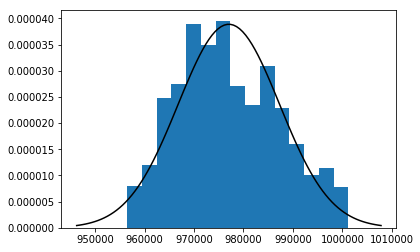

In [129]:
proc_1 =generate_process_X(c1)
plt.hist(proc_1,bins=15,density=True)

avg= np.mean(proc_1)
std = np.std(proc_1)
x=np.linspace(avg-3*std,avg+3*std,100)
plt.plot(x,norm.pdf(x,avg,std),color='black')
plt.show()

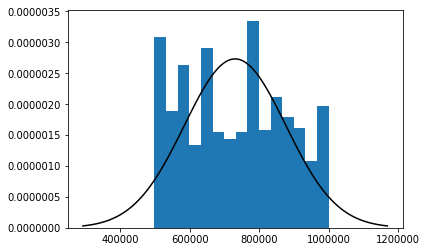

In [117]:
proc_2 =generate_process_X(c2)
plt.hist(proc_2,bins=15,density=True)

avg= np.mean(proc_2)
std = np.std(proc_2)
x=np.linspace(avg-3*std,avg+3*std,100)
plt.plot(x,norm.pdf(x,avg,std),color='black')
plt.show()

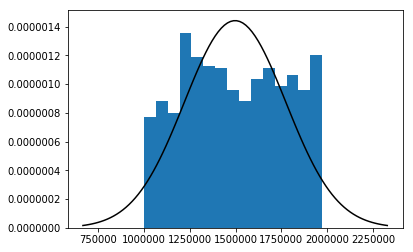

In [116]:
proc_3 =generate_process_X(c3)
plt.hist(proc_3,bins=15,density=True)

avg= np.mean(proc_3)
std = np.std(proc_3)
x=np.linspace(avg-3*std,avg+3*std,100)
plt.plot(x,norm.pdf(x,avg,std),color='black')
plt.show()